# Load Curve for 3 different Dates (Half-hourly basis)

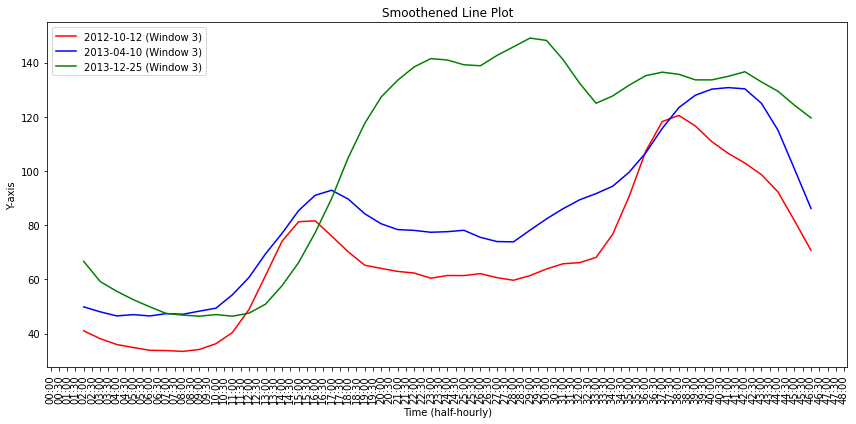

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

dtype_options = {'tstp': str}

dfs = []

for block_id in range(0, 5):
    filename = f'block_{block_id}.csv'
    df = pd.read_csv(filename, dtype=dtype_options)
    dfs.append(df)

combined_data = pd.concat(dfs, ignore_index=True)

combined_data['Date'] = combined_data['tstp'].str.split(' ').str[0]
combined_data['Time'] = combined_data['tstp'].str.split(' ').str[1]

combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Time'] = pd.to_datetime(combined_data['Time'], format='%H:%M:%S.%f').dt.time

desired_date1 = '2012-10-12'
desired_date2 = '2013-04-10'
desired_date3 = '2013-12-25'

filtered_data1 = combined_data[combined_data['Date'] == desired_date1]
half_hourly_data1 = filtered_data1.groupby('Time')['energy(kWh/hh)'].sum()

filtered_data2 = combined_data[combined_data['Date'] == desired_date2]
half_hourly_data2 = filtered_data2.groupby('Time')['energy(kWh/hh)'].sum()

filtered_data3 = combined_data[combined_data['Date'] == desired_date3]
half_hourly_data3 = filtered_data3.groupby('Time')['energy(kWh/hh)'].sum()


list_sum_data1 = []
list_sum_data2 = []
list_sum_data3 = []




for i in range(0, 47):
    houses = 0
    float_list = []
    housewise_list = []
    string_list = half_hourly_data1[i].split(' ')
    for item in string_list:
        try:
            if item:
                float_value = float(item)
                houses = houses + 1
            else:
                float_value = 0.0
            
            float_list.append(float_value)
        except ValueError:
            print(f"Unable to convert: {item}")
    
    list_sum_data1.append(sum(float_list))



for i in range(0, 47):
    houses = 0
    float_list = []
    string_list = half_hourly_data2[i].split(' ')
    for item in string_list:
        try:
            if item:
                float_value = float(item)
                houses = houses + 1
            else:
                float_value = 0.0
            float_list.append(float_value)
        except ValueError:
            print(f"Unable to convert: {item}")

    list_sum_data2.append(sum(float_list))
    




    
for i in range(0, 47):
    houses = 0
    float_list = []
    string_list = half_hourly_data3[i].split(' ')
    for item in string_list:
        try:
            if item:
                float_value = float(item)
                houses = houses + 1
            else:
                float_value = 0.0
            float_list.append(float_value)
        except ValueError:
            print(f"Unable to convert: {item}")

    list_sum_data3.append(sum(float_list))

x_axis = []
for i in range(0, 47):
    x_axis.append(i)

data1 = {'X': x_axis, 'Y': list_sum_data1}
data2 = {'X': x_axis, 'Y': list_sum_data2}
data3 = {'X': x_axis, 'Y': list_sum_data3}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

window_size = 3

df1['Smoothed_Y'] = df1['Y'].rolling(window=window_size).mean()
df2['Smoothed_Y'] = df2['Y'].rolling(window=window_size).mean()
df3['Smoothed_Y'] = df3['Y'].rolling(window=window_size).mean()

ig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df1['X'], df1['Smoothed_Y'], label=f'2012-10-12 (Window {window_size})', color='red', linestyle='-')
ax.plot(df2['X'], df2['Smoothed_Y'], label=f'2013-04-10 (Window {window_size})', color='blue', linestyle='-')
ax.plot(df3['X'], df3['Smoothed_Y'], label=f'2013-12-25 (Window {window_size})', color='green', linestyle='-')

half_hour_locator = MultipleLocator(base=0.5)
time_formatter = FuncFormatter(lambda val, _: f"{int(val):02d}:{int((val % 1) * 60):02d}")

ax.xaxis.set_major_locator(half_hour_locator)
ax.xaxis.set_major_formatter(time_formatter)

ax.set_xlabel('Time (half-hourly)')
ax.set_ylabel('Y-axis')
ax.set_title('Smoothened Line Plot')
ax.legend()

# Rotate X-axis labels vertically for better visibility
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Plot the houses per x-axis(half-hourly intervals)

In [2]:
import pandas as pd

# Assuming half_hourly_data1 is a Pandas Series containing space-separated values for each time slot

# Split the space-separated values and convert them to separate columns
house_columns = half_hourly_data1.str.split(expand=True)

# Replace None or missing values with 0.0
house_columns = house_columns.fillna(0.0)

# Rename the columns as "House_1", "House_2", and so on
house_columns.columns = [f"House_{i+1}" for i in range(house_columns.shape[1])]

# Add a "Time" column for the time slots
house_columns.insert(0, "Time", half_hourly_data1.index)

# Reset the index
house_columns.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(house_columns)


        Time House_1 House_2    House_3    House_4 House_5 House_6 House_7  \
0   00:00:00   0.698       1      0.195      0.199   0.032   0.223   0.025   
1   00:30:00       0   0.975      1.066      1.438   0.189   0.061   0.203   
2   01:00:00       0   0.532      1.072       0.21   0.151   0.066   0.199   
3   01:30:00       0    0.09      1.012      0.242   0.087   0.063   0.174   
4   02:00:00       0   0.056       1.01      0.082   0.064    0.08   0.145   
5   02:30:00       0   0.028       0.96      0.132    0.04    0.06   0.155   
6   03:00:00       0   0.046      0.941      0.157   0.061   0.025   0.163   
7   03:30:00       0   0.019      0.977      0.104   0.064    0.06   0.124   
8   04:00:00       0   0.054      0.989      0.141   0.075   0.067   0.071   
9   04:30:00       0   0.029      0.989      0.203   0.095   0.063   0.133   
10  05:00:00       0    0.07      1.044      0.191   0.085   0.051    0.18   
11  05:30:00       0   0.097      1.096      0.243   0.074   0.0

In [3]:
house_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 213 entries, Time to House_212
dtypes: object(213)
memory usage: 80.0+ KB


In [4]:
house_columns.plot()

TypeError: no numeric data to plot

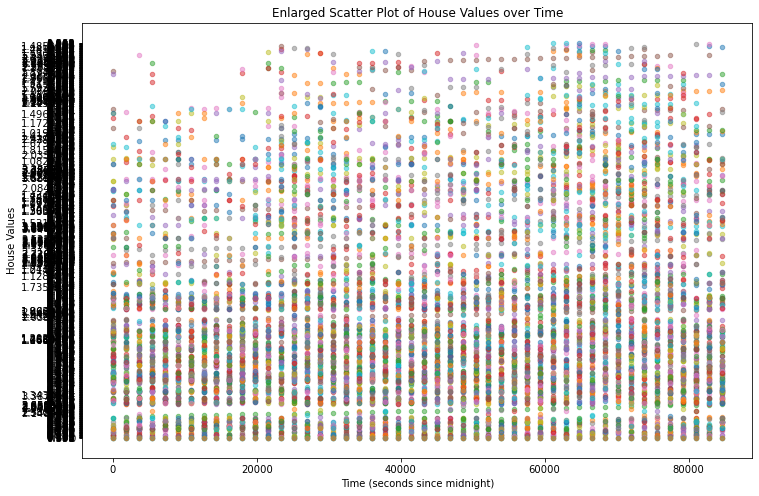

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the "house_columns" DataFrame with the "Time" and "House" columns

# Extract the "Time" column and columns starting with "House_"
time_column = house_columns["Time"]
house_columns_subset = house_columns.filter(like="House_")

# Convert datetime.time objects to seconds since midnight
time_seconds = [t.hour * 3600 + t.minute * 60 + t.second for t in time_column]

# Create a larger scatter plot for each "House" column
plt.figure(figsize=(12, 8))  # Set the figure size

for column in house_columns_subset.columns:
    plt.scatter(time_seconds, house_columns_subset[column], label=column, s=20, alpha=0.5)

# Customize the plot
plt.xlabel("Time (seconds since midnight)")
plt.ylabel("House Values")
plt.title("Enlarged Scatter Plot of House Values over Time")
# plt.legend(loc="upper right")

# Show the plot
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have the "house_columns" DataFrame with the "Time" and "House" columns

# Extract the "Time" column and columns starting with "House_"
time_column = house_columns["Time"]
house_columns_subset = house_columns.filter(like="House_")

# print(house_columns_subset)

# Transpose the data so that each row represents a house, and each column a time interval
house_data_transposed = house_columns_subset.T

# print(house_data_transposed)

# Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(house_data_transposed)

# Perform K-Means clustering
n_clusters = 4  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(house_data_transposed)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# for cluster in range(n_clusters):
#     cluster_mask = (cluster_labels == cluster)
#     plt.scatter(time_seconds[cluster_mask], np.full(sum(cluster_mask), cluster), s=10, label=f'Cluster {cluster}', alpha=0.5)

# print(cluster_labels)

house_data_transposed['cluster']=cluster_labels
print(house_data_transposed)

# plt.xlabel("Time (seconds since midnight)")
# plt.ylabel("Cluster Label")
# plt.title("K-Means Clustering of Houses Based on Time")
# plt.legend()
# plt.show()


               0      1      2      3      4      5      6      7      8  \
House_1    0.698      0      0      0      0      0      0      0      0   
House_2        1  0.975  0.532   0.09  0.056  0.028  0.046  0.019  0.054   
House_3    0.195  1.066  1.072  1.012   1.01   0.96  0.941  0.977  0.989   
House_4    0.199  1.438   0.21  0.242  0.082  0.132  0.157  0.104  0.141   
House_5    0.032  0.189  0.151  0.087  0.064   0.04  0.061  0.064  0.075   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
House_208  0.573  0.084  0.072  0.063  0.048  0.096  0.071  0.042   0.08   
House_209    0.0  0.258  0.375  0.103  0.103  0.103  0.046  0.097  0.142   
House_210    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
House_211    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
House_212    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

               9  ...         39         40         41     42     43  \
House_1        

<Figure size 864x576 with 0 Axes>

In [7]:

def getSum(df):
    sum=0.0
    for index, row in df.iloc[1:].iterrows():
        for column, value in row.iloc[1:47].items():
#             print(type(value))
#             if(value.isdigit()):
                sum=sum+float(value)
        sum = sum/48
    return sum/len(df)


In [8]:
cluster0 = house_data_transposed[house_data_transposed['cluster']==0]
cluster1 = house_data_transposed[house_data_transposed['cluster']==1]
cluster2 = house_data_transposed[house_data_transposed['cluster']==2]
cluster3 = house_data_transposed[house_data_transposed['cluster']==3]
sum1 = getSum(cluster0)
sum2 = getSum(cluster1)
sum3 = getSum(cluster2)
sum4 = getSum(cluster3)

In [10]:
print(sum1)
print(sum2)
print(sum3)
print(sum4)
print(cluster1)

0.004694787319362633
0.0011436810079323786
0.12854297314116955
0.1137575878891577
               0      1      2      3      4      5      6      7      8  \
House_1    0.698      0      0      0      0      0      0      0      0   
House_6    0.223  0.061  0.066  0.063   0.08   0.06  0.025   0.06  0.067   
House_7    0.025  0.203  0.199  0.174  0.145  0.155  0.163  0.124  0.071   
House_8    0.165  0.078  0.024  0.061  0.042  0.032  0.067  0.025  0.066   
House_9    0.133  0.101    0.1  0.093   0.12  0.161  0.131   0.09  0.088   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
House_208  0.573  0.084  0.072  0.063  0.048  0.096  0.071  0.042   0.08   
House_209    0.0  0.258  0.375  0.103  0.103  0.103  0.046  0.097  0.142   
House_210    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
House_211    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
House_212    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     

In [55]:
cluster2.to_csv('selectedHousesTest_1.csv', index=False)